## Rescaled Image version
Rescaling the already small images turns the results into absolute garbage so lets make a version where we do this and then try some other methods with it to see if there's anything better or not in combination. 

In [1]:
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(42)

In [2]:


import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Layer, Lambda
from sklearn.model_selection import train_test_split
import os
import imageio
import cv2
import glob2
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils


Using TensorFlow backend.


In [3]:
import glob

In [4]:
%pwd
#'C:\\Users\\Thomas\\Malaria Project'

'C:\\Users\\Thomas\\Malaria Project'

In [5]:
example_image = imageio.imread('example.png')

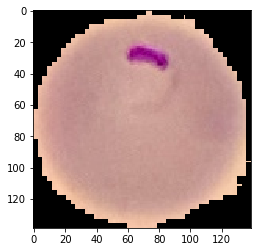

In [6]:
plt.imshow(example_image)

In [7]:
parasitized_cells = os.listdir('C:\\Users\\Thomas\\Malaria Project\\Parasitized\\')
#Importing the data for the parasitized cells

uninfected_cells = os.listdir('C:\\Users\\Thomas\\Malaria Project\\Uninfected')
#importing uninfected cell image data


In [8]:
print(len(parasitized_cells))
print(len(uninfected_cells))
#confirming all the data was put in 

13780
13780


In [9]:
data = []
labels = []

for img in parasitized_cells:
    try:
        img_read = plt.imread('C:\\Users\\Thomas\\Malaria Project\\Parasitized\\' + img)
        img_resize = cv2.resize(img_read, (50,50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        print("Error with Parasitized cell")
        
for img in uninfected_cells:
    try: 
        img_read = plt.imread('C:\\Users\\Thomas\\Malaria Project\\Uninfected\\' + img)
        img_resize = cv2.resize(img_read, (50,50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        print("Error with uninfected cell")


Error with Parasitized cell
Error with uninfected cell


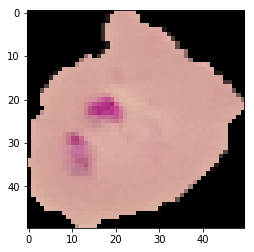

In [10]:
#Checking to see if the images were imported
plt.imshow(data[3])
plt.show()

In [11]:
image_data = np.array(data)
labels = np.array(labels)

In [12]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [13]:
import collections

labels
collections.Counter(labels)

Counter({1: 13779, 0: 13779})

In [14]:
#Train test split time
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = .2, random_state = 42)

In [15]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)

y_test  = np_utils.to_categorical(y_test, num_classes = 2)

In [16]:
print(f"Shape of training image data : {x_train.shape}")
print(f"Shape of testing image data : {x_test.shape}")
print(f"Shape of training labels : {y_train.shape}")
print(f"Shape of testing labels: {y_test.shape}")

Shape of training image data : (22046, 50, 50, 3)
Shape of testing image data : (5512, 50, 50, 3)
Shape of training labels : (22046, 2)
Shape of testing labels: (5512, 2)


In [17]:


import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers



In [18]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [19]:
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, 
                channels = channels)
model.summary()








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
____________________

In [20]:
import keras_metrics

In [21]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
#history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
#loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
import tensorflow as tf
keras.backend.get_session().run(tf.global_variables_initializer())


In [23]:
first_model = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
22046/22046 [==============================] - 11s 518us/step - loss: 0.5619 - acc: 0.7479 - f1_m: 0.7479 - precision_m: 0.7479 - recall_m: 0.74796s - loss: 
Epoch 2/20
22046/22046 [==============================] - 10s 457us/step - loss: 0.2342 - acc: 0.9125 - f1_m: 0.9125 - precision_m: 0.9125 - recall_m: 0.9125
Epoch 3/20
22046/22046 [==============================] - 9s 419us/step - loss: 0.2003 - acc: 0.9317 - f1_m: 0.9317 - precision_m: 0.9317 - recall_m: 0.9317 0s - loss: 0.2020 - acc: 0.9310 - f1_m: 0.9310 - precision_m: 0.9310 - recal
Epoch 4/20
22046/22046 [==============================] - 9s 430us/step - loss: 0.1855 - acc: 0.9389 - f1_m: 0.9389 - precision_m: 0.9389 - recall_m: 0.9389 0s - loss: 0.1843 - acc: 0.9390 - f1_m: 0.9390 - precision_m: 0.9390 - recall_m: 0.9
Epoch 5/20
22046/22046 [==============================] - 8s 384us/step - loss: 0.1809 - acc: 0.9423 - f1_m: 0.9423 - precision_m: 0.9423 - recall_m: 0.9423 
Epoch 6/20
22046/22046 [===============

In [24]:
predictions = model.evaluate(x_test, y_test)


print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

5512/5512 [==============================] - 1s 197us/step
LOSS : 0.12110138031909531
ACCURACY : 0.9626269956458636


In [25]:
y_pred = model.predict(x_test)
y_pred_tensor = tf.convert_to_tensor(y_pred, np.float32)
y_test_tensor = tf.convert_to_tensor(y_test, np.float32)
sess = tf.InteractiveSession()



In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

y_pred2=np.argmax(y_pred, axis=1)
y_test2=np.argmax(y_test, axis=1)
confusion_matrix(y_test2, y_pred2)

array([[2630,   83],
       [ 123, 2676]], dtype=int64)

In [27]:
recall_score(y_test2, y_pred2)

0.9560557341907824

In [28]:
print("Recall score of the model: " +str(recall_score(y_test2, y_pred2)))

Recall score of the model: 0.9560557341907824


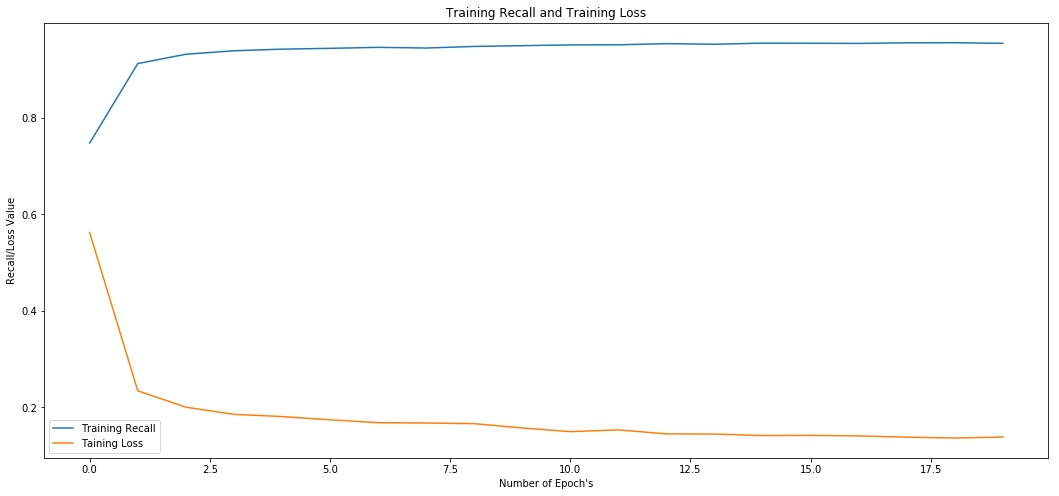

In [29]:
plt.figure(figsize = (18,8))
plt.plot(range(20), first_model.history['acc'], label = 'Training Recall')
plt.plot(range(20), first_model.history['loss'], label = 'Taining Loss')

plt.xlabel("Number of Epoch's")
plt.ylabel('Recall/Loss Value')
plt.title('Training Recall and Training Loss')
plt.legend(loc = "best")
#graphing how the accuracy and loss change over the epochs

In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = True)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [32]:
augmented_model = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [33]:

aug_optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
augmented_model.compile(loss = 'categorical_crossentropy', 
                        optimizer = aug_optim, 
                        metrics = ['acc',f1_m,precision_m, recall_m])

In [34]:
history_augmented_model = augmented_model.fit_generator(train_generator,
                                 steps_per_epoch = len(x_train) // 64,
                                epochs = 20)

Epoch 1/20
344/344 [==============================] - 21s 60ms/step - loss: 0.8386 - acc: 0.5690 - f1_m: 0.5690 - precision_m: 0.5690 - recall_m: 0.5690 1s - loss: 0.8490 - acc: 0.5667 - f1_m: 0.5667 - precision_m: 0.5667 - - ETA: 0s - loss: 0.8424 - acc: 0.5675 - f1_m: 0.5675 - precision_m: 0.5675 - recall_m:
Epoch 2/20
344/344 [==============================] - 20s 60ms/step - loss: 0.6498 - acc: 0.6446 - f1_m: 0.6446 - precision_m: 0.6446 - recall_m: 0.6446 17s - loss: 0.6728 - acc: 0.6306 - - ETA: 12s - loss: 0.6692 - acc: 0.6305 - f1_m: 0.6305  - ETA: 11s - loss: - ETA: - ETA: 2s - loss: 0.6535 - acc: 0.6409 - f1_m
Epoch 3/20
344/344 [==============================] - 21s 60ms/step - loss: 0.5135 - acc: 0.7524 - f1_m: 0.7524 - precision_m: 0.7524 - recall_m: 0.7524
Epoch 4/20
344/344 [==============================] - 21s 60ms/step - loss: 0.3712 - acc: 0.8462 - f1_m: 0.8462 - precision_m: 0.8462 - recall_m: 0.8462
Epoch 5/20
344/344 [==============================] - 20s 59ms/ste

In [35]:
prediction_2 = augmented_model.evaluate_generator(val_generator, steps = 5)

In [36]:


print(f'LOSS : {prediction_2[0]}')
print(f'ACCURACY : {prediction_2[1]}')

LOSS : 0.1306037649512291
ACCURACY : 0.96875


In [37]:
print(prediction_2)

[0.1306037649512291, 0.96875, 0.9687499523162841, 0.96875, 0.96875]


In [38]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 31} )
sess = tf.Session(config=config) 
sess.as_default()

y_test_tensor = tf.convert_to_tensor(y_test, np.float32)

y_pred_augmented = augmented_model.predict(x_test)
y_pred_augmented_tensor = tf.convert_to_tensor(y_pred_augmented, np.float32)


In [39]:
from sklearn.metrics import confusion_matrix
y_pred2_augmented=np.argmax(y_pred_augmented, axis=1)
y_test2=np.argmax(y_test, axis=1)
augmented_matrix = confusion_matrix(y_test2, y_pred2_augmented)
print(augmented_matrix)


[[2713    0]
 [2788   11]]


In [40]:
recall_score(y_test2, y_pred2_augmented)

0.003929974991068239

### Rescaling results
Rescaling these images worked out very poorly on the augmented data set. 